## Import Necessary Packages

In [1]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
week_days=set(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
clean_data={}
index=-1

In [3]:
# Parse log file
log_file=urllib.request.urlopen('https://raw.githubusercontent.com/kaazima/Internet-Analysis-Project/master/statistics.log')
for line in log_file:
  unclean_data=line.decode("utf-8")
  if unclean_data[:3] in week_days:
    index+=1
    clean_data[index]={}
    clean_data[index]['Day']=unclean_data[:3]
    time=unclean_data.split()[3].split(':')
    clean_data[index]['Hour']=int(time[0])
    clean_data[index]['Min']=int(time[1])
  else:
    unclean_data=unclean_data.split(':')
    prop=unclean_data[0].strip()
    remain=unclean_data[1].strip()
    if prop=='Server':
      clean_data[index][prop]=remain.split('(')[0].strip()
    elif prop=='Latency' and remain!='FAILED':
      remain=remain.split('(')
      clean_data[index][prop]=float(remain[0].strip().split()[0])
      clean_data[index]['Jitter']=float(remain[1].split()[0])
    elif (prop=='Download' or prop=='Upload') and remain!='FAILED':
      clean_data[index][prop]=float(remain.split()[0])
    elif prop=='Packet Loss' and remain!='Not available.':
      clean_data[index][prop]=float(remain.split('%')[0])

## Generate a DataFrame that contains Cleansed Data

In [4]:
# Convert dictionary to pandas dataframe
data=pd.DataFrame.from_dict(clean_data,orient ='index')

In [5]:
data.head(7)

,Day,Hour,Min,Server,Latency,Jitter,Download,Upload,Packet Loss
0,Tue,12,38,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
1,Tue,12,40,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
2,Tue,12,42,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
3,Tue,12,44,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
4,Tue,12,46,NaN,NaN,NaN,NaN,NaN,NaN
5,Tue,12,48,Cherrinet - K Net Solutions Pvt Ltd - Chennai,78.04,2.55,7.99,NaN,NaN
6,Tue,12,50,ACT Fibernet - Chennai,42.17,19.01,5.58,1.33,0.0


## Most Connected Server

In [6]:
print('Number of times each server is connected is as follows:\n')
data['Server'].value_counts()

Number of times each server is connected is as follows:



Airtel Broadband - Chennai                           697
Airconnect Fibernet - Chennai                        563
Airgenie - Chennai                                   510
TataSky Broadband Private Limited - Chennai          406
Shyam Spectra - Chennai                              399
ACT Fibernet - Chennai                               399
Sri Vari Network Private Limited - Chennai           391
Cherrinet - K Net Solutions Pvt Ltd - Chennai        375
Jio - Chennai                                        329
Pulse Telesystems - Chennai                           41
Vi India - Chennai                                    34
Arjuntelecom - Chennai                                25
TATASky Broadband Pvt Ltd - Bangalore                  4
Surround Networks Pvt Ltd. - Bengaluru                 3
JIFFY CABLE AND DATACOM - Bangalore                    3
I-ON - Bengaluru                                       2
North East Dataa Network Pvt Ltd - Bangalore           2
Airtel Broadband - Bangalore   

*   The most connected server is **Airtel Broadband - Chennai**



## Analysis of Network Outages

In [7]:
day_outages={}
hour_outages={}

In [8]:
# Initialise the number of outages for each day to "0"
for day in week_days:
  day_outages[day]=0
# Initialise the number of outages for each hour to "0"
for hour in range(24):
  hour_outages[hour]=0

In [9]:
# Count the number of outages for each day, and for each hour
for index in range(len(data)):
  if data.loc[index].isna().sum()==6:
    day_outages[data.loc[index]['Day']]+=1
    hour_outages[data.loc[index]['Hour']]+=1

##### Plot Network Outages on each day

In [11]:
# Sort day_outages in descending order
# Here, lambda function accepts a key-value pair as an argument and returns the value field from that pair
print(sorted(day_outages.items(),key=lambda item:item[1],reverse=True))
# List of tuples, where each tuple corresponds to (day,no of outages)

[('Tue', 197), ('Sat', 172), ('Wed', 154), ('Fri', 109), ('Mon', 44), ('Sun', 4), ('Thu', 0)]


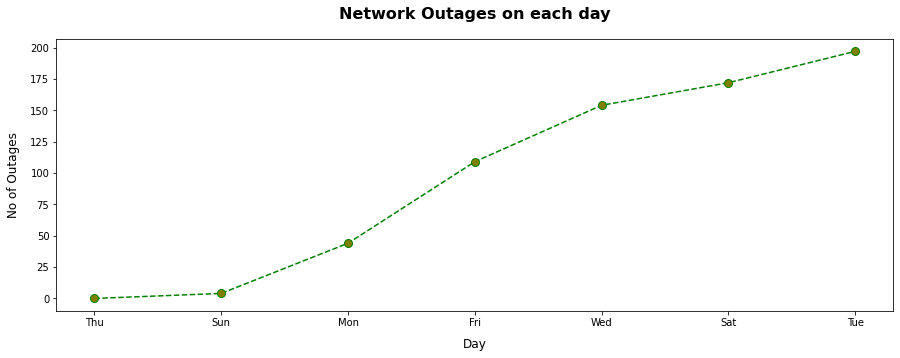

In [101]:
fig = plt.figure(figsize =(15, 5)) 
# Sort day_outages in ascending order
day,day_outage = zip(*sorted(day_outages.items(),key=lambda item:item[1]))
# Plotting the no of outages on each day
plt.plot(day, day_outage, color='green', linestyle='dashed', linewidth = 1.5, marker='o', markerfacecolor='olive', markersize=8)
# Naming the x and y axes
plt.xlabel('Day',labelpad=10,fontsize='large')
plt.ylabel('No of Outages',labelpad=10,fontsize='large')
plt.title('Network Outages on each day',pad=20,fontweight='bold',fontsize=16)
plt.show()



*   **Tuesday** had the most network outages
*   **Thursday** had the least network outages

##### Plot Network Outages for each hour

In [23]:
# Sort hour_outages in descending order
print(sorted(hour_outages.items(),key=lambda item:item[1],reverse=True))
# List of tuples, where each tuple corresponds to (hour,no of outages)

[(8, 127), (6, 121), (5, 120), (7, 120), (4, 104), (9, 36), (14, 25), (3, 14), (13, 4), (10, 2), (21, 2), (12, 1), (15, 1), (17, 1), (19, 1), (22, 1), (0, 0), (1, 0), (2, 0), (11, 0), (16, 0), (18, 0), (20, 0), (23, 0)]


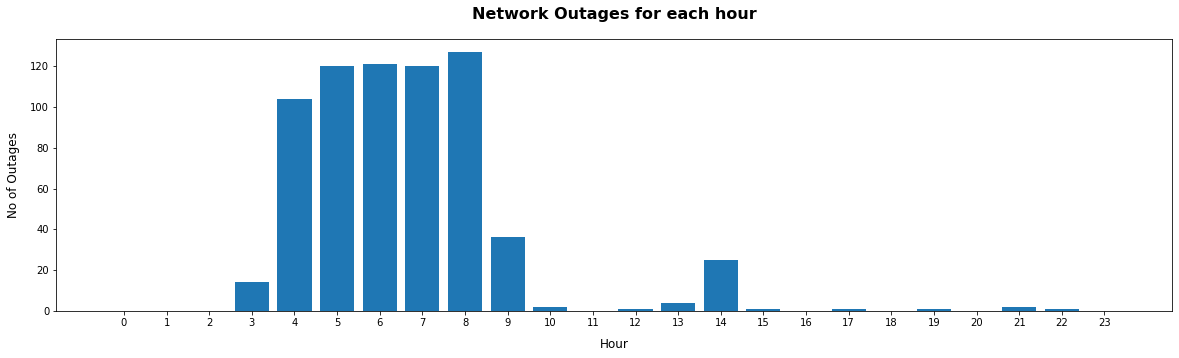

In [99]:
fig = plt.figure(figsize =(20, 5)) 
plt.bar(hour_outages.keys(), hour_outages.values())
plt.xticks(range(24))
plt.xlabel('Hour',labelpad=10,fontsize='large')
plt.ylabel('No of Outages',labelpad=10,fontsize='large')
plt.title('Network Outages for each hour',pad=20,fontweight='bold',fontsize=16)
plt.show()


*   **08:00** had the most network outages
*   **00:00, 01:00, 02:00, 11:00, 16:00, 18:00, 20:00, 23:00** had the least network outages